#  Created by Rahil Ansari

Customer Data Analysis Project.
Data Source: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset


In [92]:
### Importing relevant modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

In [93]:
### Importing csv file

In [94]:
df = pd.read_csv("customer_shopping_data.csv")

In [95]:
### Exploratory Analysis

In [96]:
df.shape

(99457, 10)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [98]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [99]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

No null in the entire dataset

In [100]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Average cutomer's age is 43, buys 3 products in the span of 3 years and spent approx 689 Turkish rials.
Maximum someone has spent is 5250 Turkish rials.

In [101]:
## Checking if a customer bought items twice.
df[df['customer_id'].duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


No second purchases by a customer. Or could be that data recorded only new purchases.

In [102]:
#Checking who made more purchases, male or female

In [103]:
df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [104]:
## Total spending by gender
df.groupby(['gender'], as_index=False)['price'].sum().sort_values('price', ascending=False)


,gender,price
0,Female,40931801.62
1,Male,27619564.29


In [105]:
# Average specnding by gender
df.groupby(['gender'], as_index=False)['price'].mean().sort_values('price', ascending=False)


,gender,price
1,Male,690.920933
0,Female,688.137615


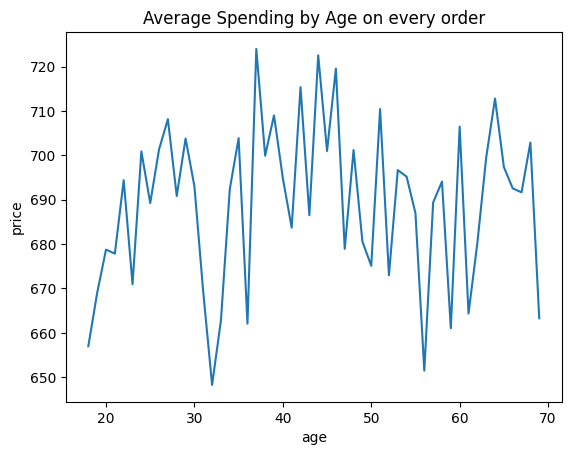

In [106]:
age_price = df.groupby(['age'], as_index=False)['price'].mean().sort_values('price', ascending=False)

sns.lineplot(data = age_price , x=age_price['age'], y = age_price['price'])
plt.title("Average Spending by Age on every order")
plt.show();

In [107]:
# Which category has been bought the most
df.groupby(['category'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)

,category,quantity
1,Clothing,103558
2,Cosmetics,45465
3,Food & Beverage,44277
7,Toys,30321
4,Shoes,30217
6,Technology,15021
0,Books,14982
5,Souvenir,14871


Clothes are bought the most followed by Cosmetics and Food & Beverages.

In [108]:
# Average money spent and quantity bought for each category
df.groupby(['category'], as_index=False)[['price', 'quantity']].mean().sort_values(by='price', ascending=False)

,category,price,quantity
6,Technology,3156.935548,3.006605
4,Shoes,1807.388568,3.011461
1,Clothing,901.084021,3.002813
2,Cosmetics,122.448626,3.011525
7,Toys,107.733185,3.005948
0,Books,45.568621,3.007830
5,Souvenir,34.894345,2.974795
3,Food & Beverage,15.671948,2.996548


In [109]:
## Creating a new column Total 
df['Total'] = df['price']*df['quantity']

In [110]:
df['Total'].head(10)

0     7502.00
1     5401.53
2      300.08
3    15004.25
4      242.40
5     7502.00
6       40.66
7     1200.32
8     2700.72
9     1200.32
Name: Total, dtype: float64

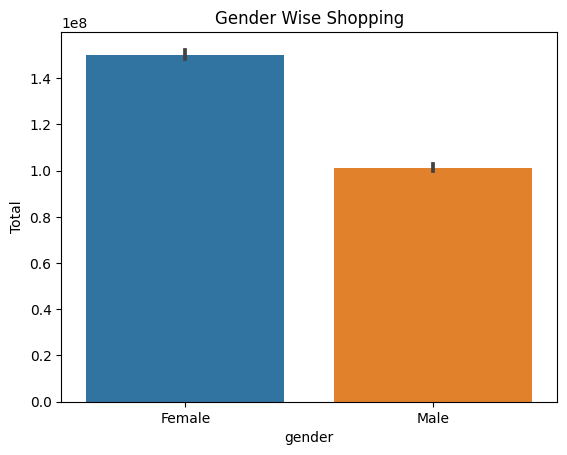

In [111]:
## Visualizing Data

sns.barplot(data=df, x = 'gender', y ='Total', estimator = sum)
plt.title('Gender Wise Shopping')
plt.show()

Female Spend significantly more than men.

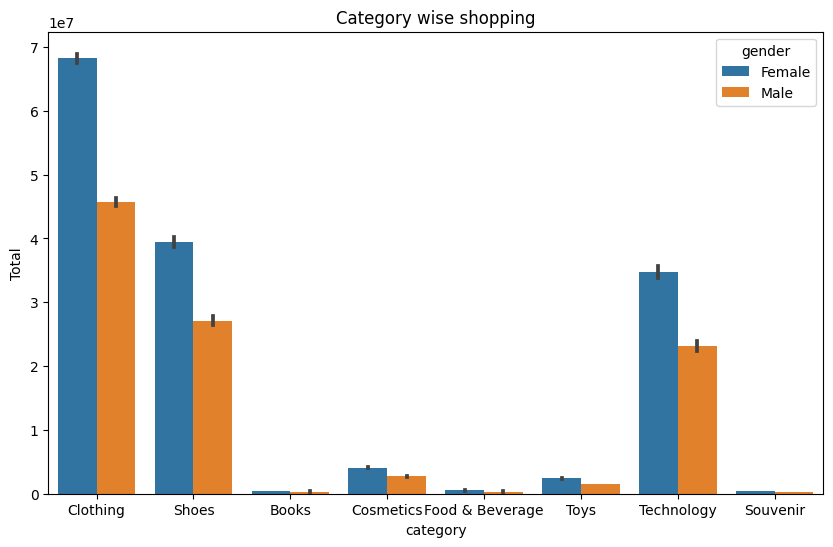

In [112]:
plt.figure(figsize = (10,6))
sns.barplot(data=df, x='category', y = 'Total',  hue = 'gender', estimator = sum)
plt.title("Category wise shopping")
plt.show();

In every category female have more purchasing power than men. Especially in clothing, shoes and technology category.

In [115]:
def age_category(x):
    if x<=20:
        return'< 20'
    elif ((x>20) & (x<=30)):
        return '20 to 30'
    elif ((x>30) & (x<=40)):
        return '30 to 40'
    elif ((x>40) & (x<50)):
        return '40 to 50'
    elif ((x>50) & (x<60)):
        return '50 to 60'
    else:
        return '> 60'
    
df['age_group'] = df['age'].apply(age_category)

## Creating list of age groups in specific order to display accordingly in the x-axis of barplot
agegroup = ['< 20','20 to 30','30 to 40','40 to 50','50 to 60', '> 60']

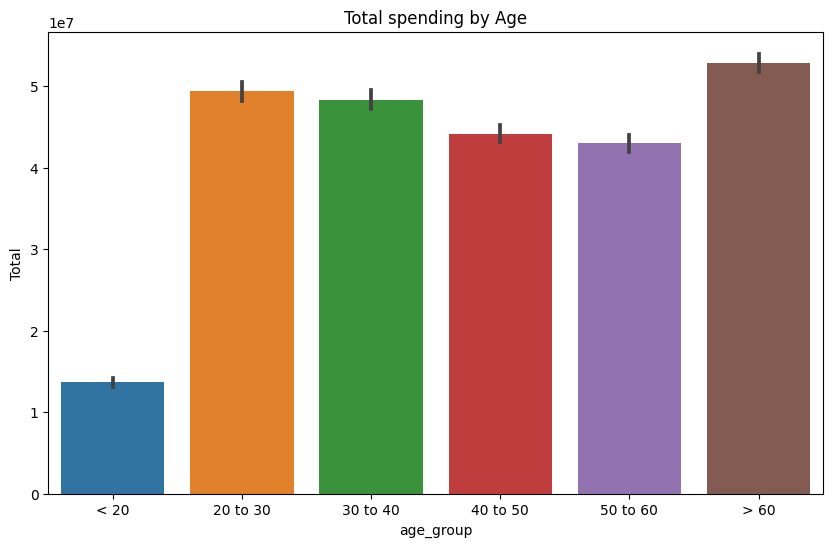

In [116]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x='age_group', y='Total', estimator=sum, order =agegroup)
plt.title("Total spending by Age")
plt.show()

Customers in age group above 20 spend almost equal amounts of money.

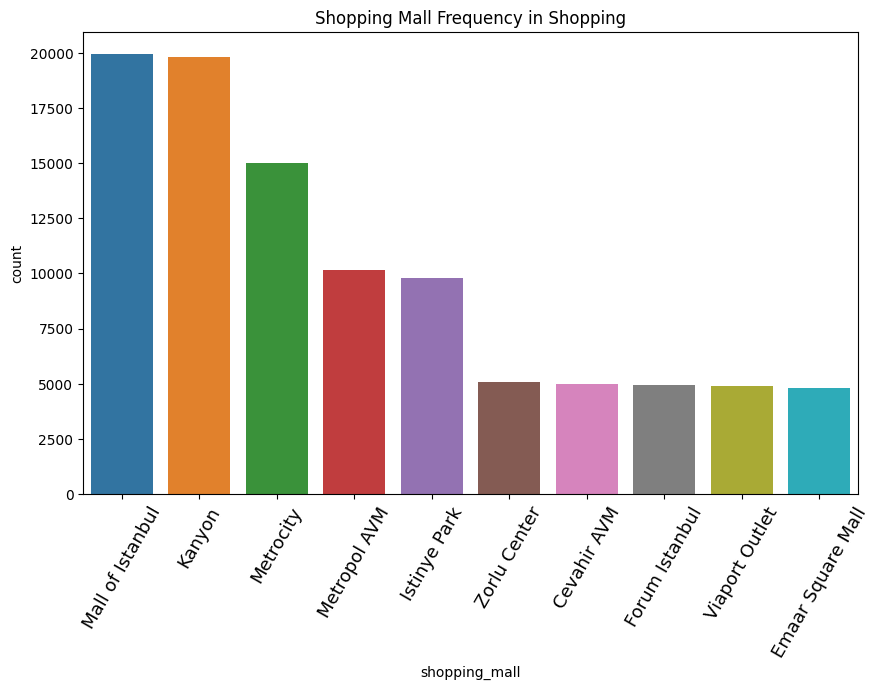

In [117]:
mall = df['shopping_mall'].value_counts()

plt.figure(figsize=(10,6))

sns.barplot(df,x=mall.index,y=mall)
plt.title('Shopping Mall Frequency in Shopping')
plt.xticks(rotation = 60, fontsize = 13)
plt.show()

Most visited malls in Istanbul are Mall of Istanbul, Kanyon and Metrocity. While least visited is Emaar Square.

In [118]:
## Creating separate columns 'Month' & 'Year' from column 'invoice_date' for further analysis

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='mixed')
df['Year'] = df['invoice_date'].dt.strftime('%Y').astype(int)
df['Month'] = df['invoice_date'].dt.strftime('%m').astype(int)


In [119]:
## Defining a function to generate month name from month number, and then map it to a separate column
## for feasibility in plotting graph
from calendar import month_name as mn
def month_num_name(x):
        return calendar.month_name[x]
    
df['Month Name'] = df['Month'].apply(month_num_name)

# month list
months = mn[1:]

# converting the column to categorical and ordered
df['Month Name'] = pd.Categorical(df['Month Name'], categories=months, ordered=True)

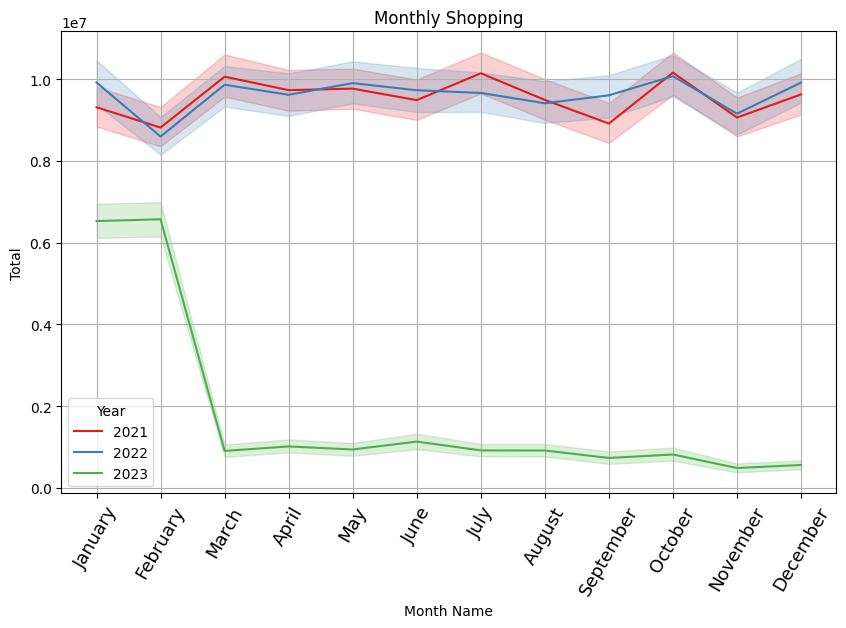

In [120]:

plt.figure(figsize=(10,6))
sns.lineplot(df,x='Month Name',y='Total',hue = 'Year',estimator = sum,palette='Set1')
plt.title('Monthly Shopping')
plt.xticks(rotation = 60, fontsize = 13)
plt.grid()
plt.show()

2023 is the running year in this dataset, therefore we do not have sufficient data for it.
While 2021 and 2022 have almost similar performance in expenditure.

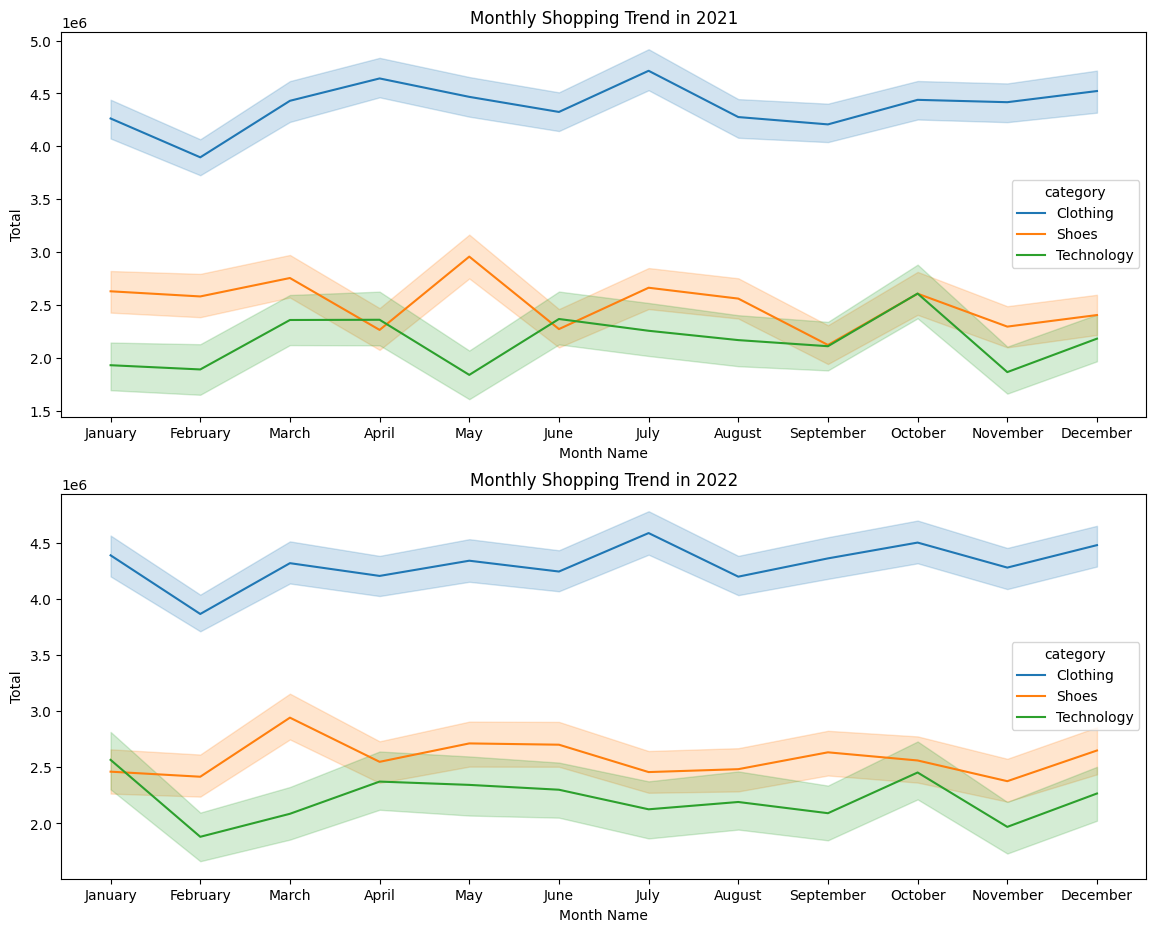

In [121]:
plt.figure(figsize=(14,11))

           
## Plot monthly shopping for 2021
df_year = df[(df['Year'] == 2021) & (df['category'].isin(['Clothing','Shoes','Technology']))]
df_year = df_year.sort_values('category')
plt.subplot(2, 1, 1)
sns.lineplot(df_year,x='Month Name',y='Total',hue = 'category',estimator = sum)
plt.title('Monthly Shopping Trend in 2021')

           
## Plot monthly shopping for 2022
df_year2 = df[(df['Year'] == 2022) & (df['category'].isin(['Clothing','Shoes','Technology']))]
df_year2 = df_year2.sort_values('category')
plt.subplot(2, 1, 2)
sns.lineplot(df_year2,x='Month Name',y='Total',hue = 'category',estimator = sum)
plt.title('Monthly Shopping Trend in 2022')

plt.show()

Money spent by customers in both years 2021 and 2022 seems to be consistent in three categories of Clothing, Shoes and technology with slight variation in the Shoe category around month of May.